In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.special import jn_zeros

%load_ext autoreload
%autoreload 2

In [ ]:
# Parameters
# Physical paramters 
L = 1e7
F1 = 5.18  # L**2/Ld1**2; can vary between 0.1 and 100
F2 = F1
a = 6.99e7 
T = 9.925*3600
U = 100
gamma = 4 * np.pi / a / a / T * (L**3) / U
# gamma = 0.7198 # 2 omega / a**2 * L**3 / U
a = a / L 

In [3]:
def Jmk(m, a, n=1):
    x_zeros = jn_zeros(m, n)
    km_n = x_zeros / a
    return km_n

In [4]:
# phi direction wavenumber
nk = 15
nm = 15
m = np.reshape(np.arange(nm), (nm,1))
k = np.empty((np.size(m), nk))
for i in m.flatten():
    k[i, :] = Jmk(i, a, n=nk)


In [5]:
a1 = (F1 + m**2 + k**2) * (F2 + m**2 + k**2) - F1 * F2 
a2 = (F1 + m**2 + k**2) * (F2 + m**2 + k**2 + gamma - 2 * F2) + (F2 + m**2 + k**2) * (- m**2 - k**2 - F1 + gamma + 2 * F1)
a3 = (- m**2 - k**2 - F1 + gamma + 2 * F1) * (F2 + m**2 + k**2 + gamma - 2 * F2) + F1 * F2 

In [6]:
c = np.empty(a1.shape + (2,), dtype=np.complex128)

# Loop through each element of the k array
for i in range(a1.shape[0]):
    for j in range(a1.shape[1]):
        
        # Compute roots and store
        c[i, j, :] = np.roots([a1[i,j], a2[i,j], a3[i,j]])

In [7]:
cr = np.real(c)  # shape (m, n, 2)
ci = np.imag(c)


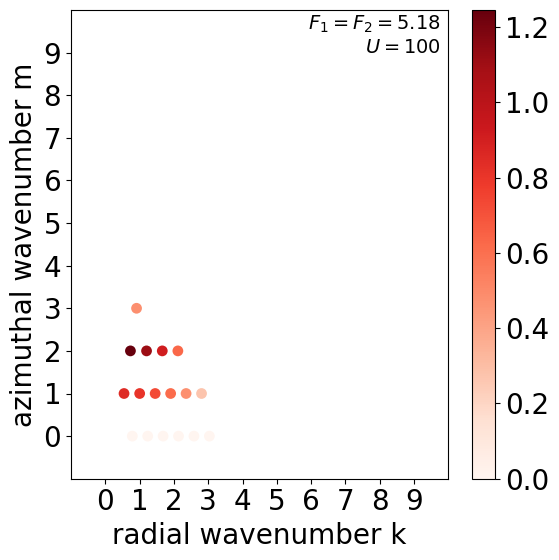

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare values
ci_slice = ci[:, :, 0]           # shape: (nm, nk)
ci_colored = np.where(ci_slice > 0, ci_slice * m, np.nan)  # shape: (nm, nk)
x = k.ravel()                    # k: shape (nm, nk), already gridded
y = m.repeat(k.shape[1], axis=1).ravel()  # m: (nm, 1) → repeat to match shape (nm, nk)
c = ci_colored.ravel()
plt.rcParams['font.size'] = 20
# Plot
plt.figure(figsize=(6, 6))
sc = plt.scatter(x, y, c=c, cmap='Reds', edgecolors='none', s=60)
plt.colorbar(sc)
plt.xlabel('radial wavenumber k')
plt.ylabel('azimuthal wavenumber m')
# plt.title('m * ci')
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))
plt.text(
    0.98, 0.9,                   # x, y in axes fraction (0–1)
    f'$F_1 = F_2 = {F1}$\n$U = {U}$',
    ha='right', va='bottom',
    transform=plt.gca().transAxes,
    fontsize=14
)
plt.tight_layout()
plt.show()


In [9]:
# plt.figure(figsize=(6, 6))
# n = (m**2 + k**2)**4
# ins_thred = [2 * F1 * F2 - F1 * np.sqrt(2 * F1 * F2 - gamma**2), 2 * F1 * F2 + F1 * np.sqrt(2 * F1 * F2 - gamma**2)]
# m 
# plt.contour(m.repeat(k.shape[1], axis=1), k, n, levels=ins_thred)
# plt.xlabel('radial wavenumber k')
# plt.ylabel('azimuthal wavenumber m')
# plt.xlim([-1, nk])
# plt.ylim([-1, nm])
# plt.xticks(np.arange(0, nk, 5))
# plt.yticks(np.arange(0, nm, 5))
# plt.tight_layout()
# plt.show()